In [3]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve
import json

Using TensorFlow backend.


In [4]:
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '-1'
os.environ['OMP_NUM_THREADS'] = '1'

# Load model

In [5]:
model = keras.models.load_model("weights.h5")

# Convergence curve

In [6]:
df_log = pd.read_csv("training.log")

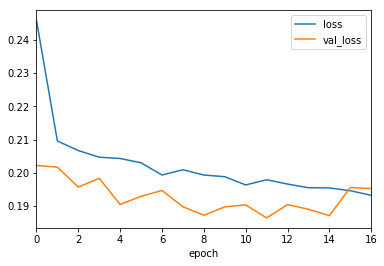

In [7]:
fig, ax = plt.subplots()
df_log.plot("epoch", "loss", ax=ax)
df_log.plot("epoch", "val_loss", ax=ax)

# Calculate NN output

In [8]:
x_train = np.load("x_train.npy")
y_train = np.load("y_train.npy")
w_train = np.load("w_train.npy")

In [9]:
x_test = np.load("x_test.npy")
y_test = np.load("y_test.npy")
w_test = np.load("w_test.npy")

In [10]:
scores_train = model.predict(x_train)
scores_test = model.predict(x_test)

# NN Output distribution

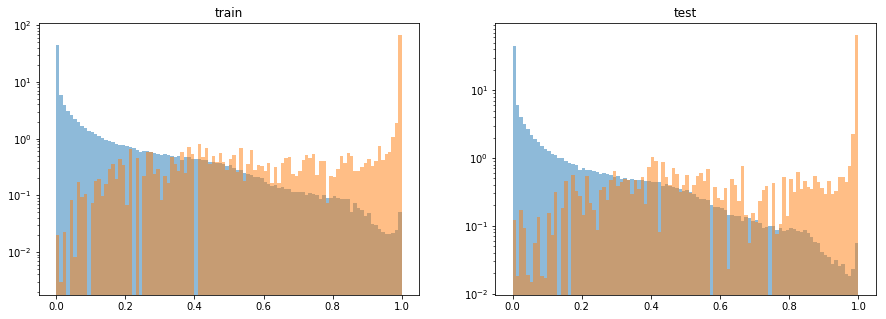

In [11]:
opts = dict(bins=100, range=(0., 1.), alpha=0.5, density=True)
plt.figure(figsize=(15, 5))
plt.subplot(121)
plt.title("train")
plt.hist(scores_train[y_train==0], weights=w_train[y_train==0], **opts)
plt.hist(scores_train[y_train==1], weights=w_train[y_train==1], **opts)
plt.yscale("log")
plt.subplot(122)
plt.title("test")
plt.hist(scores_test[y_test==0], weights=w_test[y_test==0], **opts)
plt.hist(scores_test[y_test==1], weights=w_test[y_test==1], **opts)
plt.yscale("log")

# ROC curve

In [12]:
fpr_train, tpr_train, thr_train = roc_curve(y_train, scores_train, sample_weight=w_train)

In [13]:
fpr_test, tpr_test, thr_test = roc_curve(y_test, scores_test, sample_weight=w_test)

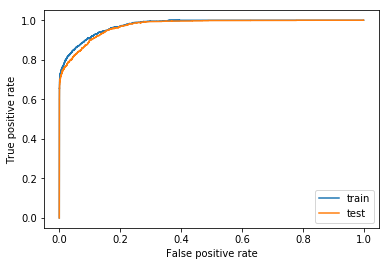

In [16]:
plt.plot(fpr_train, tpr_train, label="train")
plt.plot(fpr_test, tpr_test, label="test")
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.legend()

# Efficiency vs Purity

In [17]:
with open("transform_params.json") as f:
    transform_params = json.load(f)
    class_weights = np.array(transform_params["class_weights"])

/home/nhartmann/miniconda3/envs/ml-p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: divide by zero encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nhartmann/miniconda3/envs/ml-p3/lib/python3.6/site-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until
/home/nhartmann/miniconda3/envs/ml-p3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: divide by zero encountered in true_divide
  after removing the cwd from sys.path.
/home/nhartmann/miniconda3/envs/ml-p3/lib/python3.6/site-packages/ipykernel_launcher.py:4: RuntimeWarning: invalid value encountered in true_divide
  after removing the cwd from sys.path.


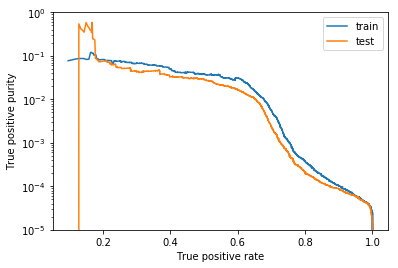

In [33]:
# class weights should give us the ratio between fail/pass base rates
r = class_weights[1] / class_weights[0]
plt.plot(tpr_train, tpr_train/(tpr_train + r*fpr_train), label="train")
plt.plot(tpr_test, tpr_test/(tpr_test + r*fpr_test), label="test")
plt.xlabel("True positive rate")
plt.ylabel("True positive purity")
plt.ylim(1e-5, 1)
plt.yscale("log")
plt.legend()